In [1]:
%load_ext tikzmagic
%matplotlib inline

# 모형 선택

이제 모형의 성능을 비교할 수 있으므로 남은 문제는 여러가지 선형회귀모형을 분석하여 가장 좋은 모형을 찾는 일이다. 이를 <b>모형 선택(model selection)</b>이라고 한다. 선형회귀분석에서는 어떤 독립변수를 사용하는가에 따라 회귀모형이 달라지므로 이를 <b>변수 선택(variable selection)</b>이고 하기도 한다.

선형회귀분석에서 변수 선택을 하는 방법은 여러가지가 있다. 모든 변수의 선택 조합에 대해 성능을 살펴보는 것은 독립변수의 개수가 많을 경우 현실적으로 어렵기 때문에 보통은 다음 두 가지 접근방식을 많이 사용한다. 

* 전진선택(forward selection) : 독립변수가 적은 간단한 모형부터 시작하여 차츰 유의한 독립변수를 추가하는 방식
* 후진제거(backward elimination) : 모든 독립변수를 사용한 가장 복잡한 모형부터 시작하여 차츰 유의하지 않은 독립변수를 제거하는 방식

이 절에서는 전진선택 방법에 대해서만 설명한다.

독립변수 선택히 가장 유의한 독립변수를 고르는 기준도 두 가지가 있다.

* 유의확률이 가장 작은 독립변수
* 가장 회귀분석 성능을 높이는 독립변수

여기에서는 가장 회귀분석 성능을 높이는 독립변수를 선택하되 해당 독립변수의 유의확률이 우리가 정한 유의수준보다 큰 경우에는 제외하는 방법을 사용하기로 한다.

이 절에서는 보스턴 집값 데이터를 예제 데이터로 사용한다

In [2]:
import statsmodels.api as sm

boston = sm.datasets.get_rdataset("Boston", "MASS").data
boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


일단 하나의 독립변수만 사용한 모형을 비교해보자. 보스턴 집값 데이터에는 13개의 독립변수가 있으므로 13개의 모형이 만들어진다.

In [3]:
import statsmodels.api as sm

var_names = list(filter(lambda n: n != "medv", boston.columns))  # 종속변수 medv를 제외한 독립변수 리스트
models_1 = {}
for n in var_names:
    name_n = f"model_1_{n}"
    formula_n = "medv ~ C(chas) " if n == "chas" else f"medv ~ scale({n}) "
    models_1[name_n] = sm.OLS.from_formula(formula_n, boston)

이 모형들에 대해 회귀분석을 실시하여 결과 객체를 얻는다.

In [4]:
results_1 = {}
for model_name, model in models_1.items():
    results_1[model_name] = model.fit()

회귀분석 성능은 결정계수 $R^2$로 대표되는 예측성능만 고려하기로 한다. 위에서 구한 13가지 모형의 결정계수와 유의확률을 구하면 다음과 같다.

In [5]:
import pandas as pd

df_1 = pd.DataFrame({
  "r2": {n: r.rsquared for n, r in results_1.items()},
  "pv": {n: r.pvalues[r.model.exog_names[-1]] for n, r in results_1.items()},
})
df_1.sort_values("r2", ascending=False)

,r2,pv
model_1_lstat,0.544146,5.081103e-88
model_1_rm,0.483525,2.487229e-74
model_1_ptratio,0.257847,1.609509e-34
model_1_indus,0.233990,4.900260e-31
model_1_tax,0.219526,5.637734e-29
model_1_nox,0.182603,7.065042e-24
model_1_crim,0.150780,1.173987e-19
model_1_rad,0.145639,5.465933e-19
model_1_age,0.142095,1.569982e-18
model_1_zn,0.129921,5.713584e-17


13가지 모형 중 lstat을 독립변수로 사용한 모형의 결정계수값이 0.54로 가장 결정계수가 높으므로 이를 첫번째 독립변수로 선택한다. 유의확률들이 모두 아주 작기 때문에 제외할 독립변수는 없다.

다음으로는 여기에 12가지 독립변수를 차례대로 추가하여 성능을 살펴본다.

In [6]:
var_names.remove("lstat")  # 선택된 독립변수 lstat 제외
formula_1 = "medv ~ scale(lstat) "  # 선택된 모형 문자열
models_2 = {}
for n in var_names:
    name_n = f"model_2_{n}"
    formula_n = formula_1 + " + C(chas) " if n == "chas" else formula_1 + f" + scale({n}) "
    models_2[name_n] = sm.OLS.from_formula(formula_n, boston)

results_2 = {}
for model_name, model in models_2.items():
    results_2[model_name] = model.fit()

df_2 = pd.DataFrame({
    "r2": {n: r.rsquared for n, r in results_2.items()},
    "pv": {n: r.pvalues[r.model.exog_names[-1]] for n, r in results_2.items()},
})
df_2.sort_values("r2", ascending=False)

,r2,pv
model_2_rm,0.638562,3.472258e-27
model_2_ptratio,0.606655,7.382385e-18
model_2_chas,0.562554,6.033649e-89
model_2_dis,0.562228,6.487838e-06
model_2_age,0.551269,4.906776e-03
model_2_tax,0.550570,7.573724e-03
model_2_black,0.548790,2.331593e-02
model_2_zn,0.547900,4.152669e-02
model_2_crim,0.547586,5.105917e-02
model_2_indus,0.546458,1.099809e-01


lstat과 rm 이렇게 2개의 독립변수를 사용하는 경우가 결정계수는 0.64로 가장 높다. 이 경우에도 rm 변수에 대한 유의확률이 아주 작으므로 선택 가능하다.

이 결과에서 주의할 부분은 1개의 독립변수만 넣었을 때 lstat 다음으로 성능이 좋았던 독립변수의 순서는 rm, ptratio, indus, tax 순이었지만 2개의 독립변수를 넣었을 때는 이 순서가 아니라 rm, ptratio, chas, dis의 순서가 되었다는 점이다. 즉, 개별적인 성능순서가 좋은 순으로 결합한다고 반드시 더 성능이 낫다는 보장이 없기 때문에 2개의 독립변수를 사용하는 경우는 따로 계산을 해야 한다.

다음 코드는 13개까지 이러한 전체 과정을 반복하는 작업을 자동화하는 파이썬 코드다.

In [7]:
%%time

var_names_all = list(filter(lambda n: n != "medv", boston.columns))
var_names = var_names_all.copy()
sel_ns = []
formulas = []
r2s = []
pvs = []
for k in range(len(var_names_all)):
    results_k = {}
    for n in var_names:
        if k == 0:
            formula_k_n = "medv ~ C(chas) " if n == "chas" else f"medv ~ scale({n}) "
        else:
            formula_k_n = formula_k + " + C(chas) " if n == "chas" else formula_k + f" + scale({n}) "
        results_k[n] = sm.OLS.from_formula(formula_k_n, boston).fit()
    df = pd.DataFrame({
        "r2": {n: r.rsquared_adj for n, r in results_k.items()},
        "pv": {n: r.pvalues[r.model.exog_names[-1]] for n, r in results_k.items()},
    }).sort_values("r2", ascending=False)
    sel_n = df.index[0]
    op = "C" if sel_n == "chas" else "scale"
    formula_k = f"medv ~ scale({sel_n})" if k == 0 else formula_k + f" + {op}({sel_n})"
    sel_ns.append(sel_n)
    formulas.append(formula_k)
    r2s.append(df["r2"].iloc[0])
    pvs.append(df["pv"].iloc[0])
    var_names.remove(sel_n)
last_result = results_k[sel_n]

CPU times: total: 3.09 s
Wall time: 3.12 s


최종적으로 선택된 모형은 다음과 같다.

In [8]:
last_result.model.formula

'medv ~ scale(lstat) + scale(rm) + scale(ptratio) + scale(dis) + scale(nox) + C(chas) + scale(black) + scale(zn) + scale(crim) + scale(rad) + scale(tax) + scale(indus) + scale(age) '

독립변수가 추가되면서 결정계수가 어떻게 변하였는지를 정리하면 다음과 같다.

In [9]:
s_r2 = pd.Series(r2s, index=sel_ns)
s_r2

lstat      0.543242
rm         0.637124
ptratio    0.676704
dis        0.687835
nox        0.705170
chas       0.712357
black      0.718256
zn         0.722207
crim       0.723905
rad        0.728807
tax        0.734806
indus      0.734328
age        0.733790
dtype: float64

이를 플롯으로 표시하면 다음과 같다. x축은 추가된 변수의 순서를 나타내고 y축은 결정계수 값이다.

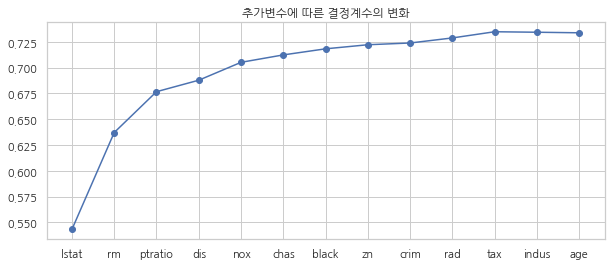

In [10]:
ax = s_r2.plot(marker="o", title="추가변수에 따른 결정계수의 변화", figsize=(10, 4))
ax.set_xticks(range(len(s_r2))) # 모든 x 라벨을 표시하기 위한 코드
ax.set_xticklabels(s_r2.index)
plt.show()

이제 선택된 독립변수들의 유의확률을 살펴본다.

In [11]:
s_pv = pd.Series(pvs, index=sel_ns)
s_pv

lstat      5.081103e-88
rm         3.472258e-27
ptratio    1.644660e-14
dis        1.668467e-05
nox        5.488148e-08
chas       1.134454e-08
black      7.719459e-04
zn         4.651616e-03
crim       4.456745e-02
rad        1.692182e-03
tax        5.214237e-04
indus      7.379887e-01
age        9.582293e-01
dtype: float64

유의수준을 1%라고 정하였을 때 indus와 age는 유의확률이 유의수준보다 크기 때문에 이 두 변수는 추가하면 안된다. 따라서 최종적으로 우리가 선택할 모형은 다음과 같다.

In [12]:
formula = "medv ~ " \
    "scale(lstat) + scale(rm) + scale(ptratio) + scale(dis) + scale(nox)" \
    "+ C(chas) + scale(black) + scale(zn) + scale(crim) + scale(rad) + scale(tax)"

이 모형의 회귀분석 결과는 다음과 같다.

In [13]:
result = sm.OLS.from_formula(formula, boston).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Fri, 29 Jul 2022   Prob (F-statistic):          5.54e-137
Time:                        08:52:12   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         22.3448      0.219    102.